## Keyword Classification Guide
1: Bond Fund: "Fund", "County", "City"

2: Insurance Company: "Insurance", "Assurance", "KSKJ", "Health", "Nationwide"

3: Investment Firm: "Investment","Investing","Capital","Trust","Wealth","Securities"

4: Retail: "Retail" "Bank","IRA","SCHWAB"

In the "Other" category if it was just someone's name or didn't contain any of the key words. If some entries contained more than one keyword, it would use the second word to categorize. For example, some trusts have IRA which I considered retail.

## Statistical Summary

1: KY has 40 NOBO's, most by an individual state

2: 34.3 % of clients have over 100,000 shares

3: 9.09 % of clients have over 1,000,000 shares

4: .83 % of clients have over 5,000,000 shares      Side Note: This is near a normal distribution of proportions

5: Nationwide has the most amount of shares in a cusip at 11,000,000.

6:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
#Using some more packages that have more functionality for the statistical goals

In [3]:
df = pd.read_csv('NOBO_Cleaned.csv') #Read data into Pandas to create a dataframe
df_copy = df.copy() #Making a copy incase the original dataframe becomes wrong

In [58]:
print(df.shape) #242 instances and 12 columns (4 new columns added when creating graphs)
df.sample(3) #random sample of 3 from data

(242, 16)


,JOB NUMBER,ISSUER NAME,CUSIP,CLIENT,CLASSIFICATION,SHARES,TOTAL SHARES,# OF NOBOS,CONTACT/ADDRESS,ADDRESS,ZIP CODE,STATE,Over_10000_Shares,Over_100000_Shares,Over_1000000_Shares,Over_5000000_Shares
221,I17079,TURNPIKE AUTHORITY OF KENTUCKY,491552UZ6,28201 NORTHWEST SAVINGS BANK,Retail,55000,41295000,40,PO BOX 128,237 2ND AVE 237 2ND A...,16365,PA,True,False,False,False
160,I17079,TURNPIKE AUTHORITY OF KENTUCKY,491552UY9,ATLAS BROWN INC,Investment Firm,10000,12640000,86,333 EAST MAIN STREET,LOUISVILLE KY 40202 LOUISVILL...,40202,KY,False,False,False,False
214,I17079,TURNPIKE AUTHORITY OF KENTUCKY,491552UZ6,MOSS ADAMS WEALTH ADVISORS LLC,Investment Firm,500000,41295000,40,999 THIRD AVENUE SUITE 2800,SEATTLE WA 98104-0000 SEATTLE ...,98104,WA,True,True,False,False


In [9]:
df['ZIP CODE'] = df['ZIP CODE'].astype(str) #Change zipcodes to objects instead of integers for consistency
df.dtypes

JOB NUMBER         object
ISSUER NAME        object
CUSIP              object
CLIENT             object
CLASSIFICATION     object
SHARES              int64
TOTAL SHARES        int64
# OF NOBOS          int64
CONTACT/ADDRESS    object
ADDRESS            object
ZIP CODE           object
STATE              object
dtype: object

In [12]:
state_counts = df['STATE'].groupby(df['STATE']).count() #Give counts for each state, KY has 40
state_counts_sorted = state_counts.sort_values(ascending=False) #Ascending order
state_counts_sorted

STATE
KY    40
FL    22
NJ    18
CA    13
IL    12
IN    10
NY     9
GA     9
TX     9
LA     9
MD     8
PA     8
CT     7
CO     6
VA     6
KS     6
OH     5
MA     5
TN     4
MO     4
NC     4
WA     4
WI     4
MI     3
MN     3
OK     2
ME     2
NV     2
AZ     2
OR     1
IA     1
HI     1
VT     1
EX     1
AL     1
Name: STATE, dtype: int64

In [18]:
state_classification = df['CLASSIFICATION'].groupby(df['CLASSIFICATION']).count() #Give counts for each classification, 
state_classification_sorted = state_classification.sort_values(ascending=False) #Ascending order
state_classification_sorted
#Keyword search was used to create this column, "Other" couldn't be classified based on the criteria

CLASSIFICATION
Retail               114
Investment Firm       68
Bond Fund             22
Other                 21
Insurance Company     17
Name: CLASSIFICATION, dtype: int64

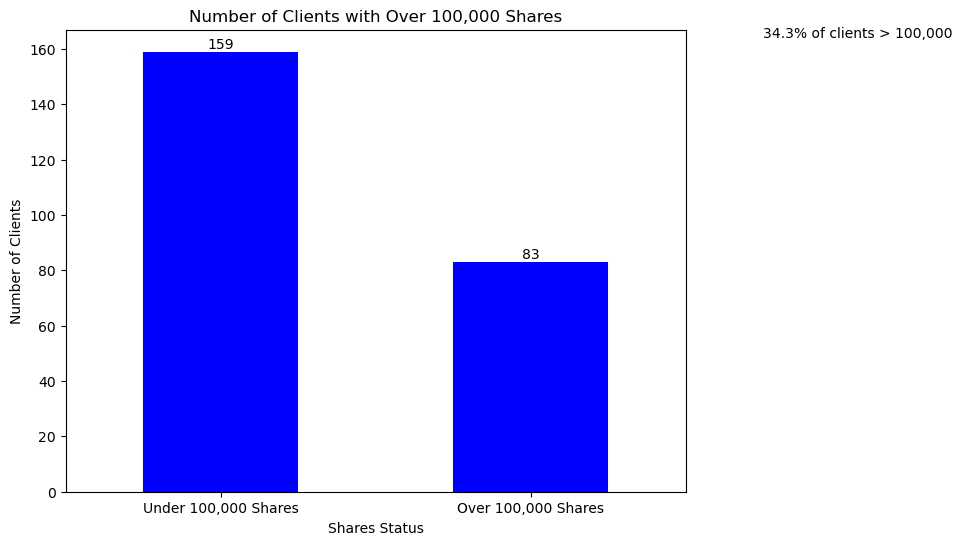

In [56]:
df['Over_100000_Shares'] = df['SHARES'] > 100000 #condition >

# Count clients with over 100,000 shares and those without
share_count = df['Over_100000_Shares'].value_counts()

# Calculate the proportion
proportion_over_100000 = share_count[1] / len(df) * 100

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = share_count.plot(kind='bar', color='blue')
plt.title('Number of Clients with Over 100,000 Shares')
plt.xlabel('Shares Status')
plt.ylabel('Number of Clients')

# Add counts on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom')

# Add proportion of clients that are over stated goal
plt.text(len(share_count) - 0.25, max(share_count) + 5, f'{round(proportion_over_100000, 2)}% of clients > 100,000', ha='left')

plt.xticks([0, 1], ['Under 100,000 Shares', 'Over 100,000 Shares'], rotation=0)
plt.show()


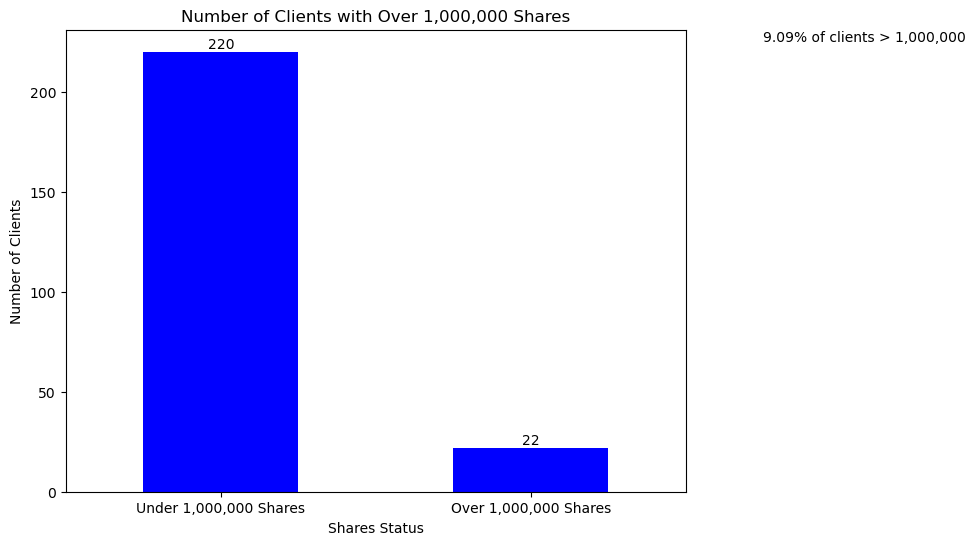

In [53]:
df['Over_1000000_Shares'] = df['SHARES'] > 1000000

# Count clients with over 1,000,000 shares and those without
share_count = df['Over_1000000_Shares'].value_counts()

# Calculate the proportion
proportion_over_1000000 = share_count[1] / len(df) * 100

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = share_count.plot(kind='bar', color='blue')
plt.title('Number of Clients with Over 1,000,000 Shares')
plt.xlabel('Shares Status')
plt.ylabel('Number of Clients')

# Add counts on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom')

# Add proportion of clients that are over stated goal
plt.text(len(share_count) - 0.25, max(share_count) + 5, f'{round(proportion_over_1000000, 2)}% of clients > 1,000,000', ha='left')

plt.xticks([0, 1], ['Under 1,000,000 Shares', 'Over 1,000,000 Shares'], rotation=0)
plt.show()


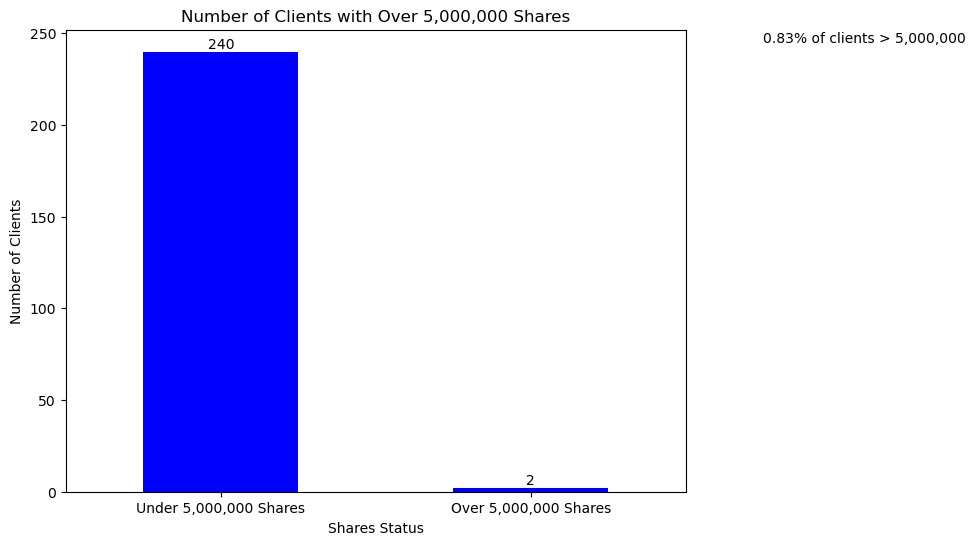

In [57]:

df['Over_5000000_Shares'] = df['SHARES'] > 5000000

# Count clients with over 5,000,000 shares and those without
share_count = df['Over_5000000_Shares'].value_counts()

# Calculate the proportion (using same function from first graph)
proportion_over_1000000 = share_count[1] / len(df) * 100

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = share_count.plot(kind='bar', color='blue')
plt.title('Number of Clients with Over 5,000,000 Shares')
plt.xlabel('Shares Status')
plt.ylabel('Number of Clients')

# Add counts on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom')

# Add proportion of clients that are over stated goal
plt.text(len(share_count) - 0.25, max(share_count) + 5, f'{round(proportion_over_1000000, 2)}% of clients > 5,000,000', ha='left')

plt.xticks([0, 1], ['Under 5,000,000 Shares', 'Over 5,000,000 Shares'], rotation=0)
plt.show()

In [42]:
#Showing how much each holder has of the total shares of their respective CUSIP
top_shareholders_by_cusip = df.groupby(['CUSIP', 'CLIENT'])[['SHARES', 'TOTAL SHARES']].sum().reset_index()
top_shareholders_by_cusip['PROPORTION OF TOTAL SHARES'] = (top_shareholders_by_cusip['SHARES'] / top_shareholders_by_cusip['TOTAL SHARES']) * 100
top_shareholders_by_cusip['PROPORTION OF TOTAL SHARES'] = top_shareholders_by_cusip['PROPORTION OF TOTAL SHARES'].round(2).astype(str) + '%'
top_shareholders_by_cusip = top_shareholders_by_cusip.sort_values(['CUSIP', 'SHARES'], ascending=[True, False]).groupby('CUSIP').head(1)

# Display the top shareholders for each CUSIP with the proportion of shares to total shares as a rounded percentage
print(top_shareholders_by_cusip[['CUSIP', 'CLIENT', 'SHARES', 'TOTAL SHARES','CLIENT', 'PROPORTION OF TOTAL SHARES']])

         CUSIP                                CLIENT    SHARES  TOTAL SHARES  \
0    491552S48  CUMBERLAND CELLULAR LLC                 300000        300000   
1    491552S63  28501 FIRST NATIONAL BANKER'S BANK      500000        750000   
3    491552S71  BRUCE PARKS                             470000       1065000   
11   491552S89  COMMUNITY TRUST AND INVESTMENTS        2750000       8755000   
24   491552S97  PHILADELPHIA INS CO                    1250000       2340000   
35   491552T21  GLASS LEWIS & CO.  LLC                 1000000       4970000   
59   491552T39  ISS/13507                              4770000       5920000   
81   491552T47  TIB-The Independent BankersBank        3995000       7110000   
84   491552T54  28501 FIRST NATIONAL BANKER'S BANK     3000000       6345000   
127  491552UY9  ISS/152/GSAM                           2805000      12640000   
193  491552UZ6  NATIONWIDE                            11000000      41295000   

                                   CLIE

## Linear Regression
I will be doing a linear regression to see if you can accurately determine if the classification based on shares.
This is just a test to see the outcome and if I can use it a predictor for "other" classifications

In [79]:
#Load necessary Packages
from sklearn.model_selection import train_test_split 

#Provides a way to calculate metrics on the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.metrics import roc_curve,  roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Decision Tree model from SKLearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Select only the relevant columns
selected_columns = ['SHARES', 'CLASSIFICATION']
df_new = df[selected_columns]

# Display the new table to make sure it is correct.
new_df.head()


,SHARES,CLASSIFICATION
0,300000,Retail
1,500000,Retail
2,250000,Bond Fund
3,470000,Insurance Company
4,295000,Bond Fund


In [75]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Filter out rows with 'other' classification since I want to try to use this to predict the "Other" classifications
df_filtered = df_new[df_new['CLASSIFICATION'] != 'other']

# Apply label encoding to the 'CLASSIFICATION' column, setting each classification as a number
label_encoder = LabelEncoder()
df_filtered['CLASSIFICATION'] = label_encoder.fit_transform(df_filtered['CLASSIFICATION'])

category_mapping = {0: 'Bond fund', 1: 'Investment firm', 2: 'Insurance company', 3: 'Retail', 4: 'Other'}
df['CLASSIFICATION'] = df['CLASSIFICATION'].map(category_mapping)

# Split the data into features (X) and target (y)
X = df_filtered[['SHARES']]
y = df_filtered['CLASSIFICATION']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
#Using decision trees since it's a smaller data set and it's not a linear regression
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model using the training set
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
#Determines how far the tree will generate and by which method
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 max_depth=5)
clf = clf.fit(X_train, y_train)

In [82]:
y_pred=clf.predict(X_test) #Function to plot the heatmap of the predicting score
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

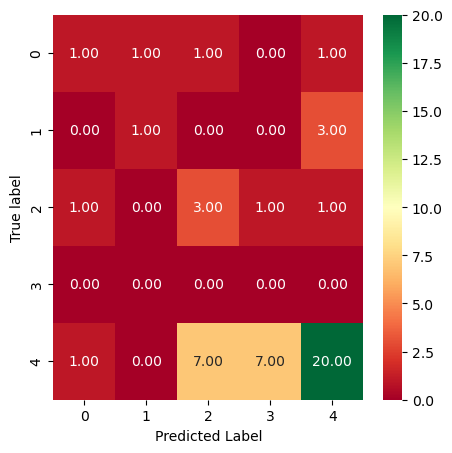

In [83]:
plot_cm(y_pred, y_test)
#0 - 4 are the different classification categories

In [84]:
print(classification_report(y_pred,y_test))
#Honestly this was not very helpful in terms of predicting classification based on shares
#In conclusion, there is not a distinct relationship between shares and type of classification but worth a shot
#low precision, recall, and f1-score indicate different types accuracy, which all are low 
#Probably need more data to have more accuracy, looking at 4 it seems to predict better with more data

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.50      0.25      0.33         4
           2       0.27      0.50      0.35         6
           3       0.00      0.00      0.00         0
           4       0.80      0.57      0.67        35

    accuracy                           0.51        49
   macro avg       0.38      0.31      0.33        49
weighted avg       0.67      0.51      0.57        49



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
